# Intuition behind the Laplace transform

*TODO: finish visualizations and content*

*TODO: fix sine wave notations and frequencies for FFT*

The Laplace transform is a mathematical operation that maps a function in the time domain $ f(t) $ to the complex frequency domain $ F(s) $.

By the end of this notebook, you should be able to:

- Use `numpy` to take the Fourier transform
- Get a better intuition of the Laplace transform and how it transforms a time domain signal to the frequency domain

## Definition
In process control, the Laplace transform is commonly used as a tool to transform ordinary differential equations into algebraic problems, where solutions can be easily found.

The Laplace transform is defined as:

$$ F(s) = \mathcal{L}\{f(t)\} = \int^{\infty}_{0}{e^{-st}f(t) dt}$$

where $s$ is a complex variable with a real and imaginary part, $s = \sigma + i\omega$, as opposed to $t$, which is a real variable.

## In the beginning, there was the Fourier transform

The Fourier transform, if you can recall from your MATH 256, Differential Equations class, is a tool that breaks down a function into sinusoids. Recall further that the Fourier transform of a function $f(t)$ to the frequency domain $\omega$ is defined as follows:

$$ F(\omega) = \int^{\infty}_{-\infty}{e^{-i\omega t}f(t)dt}$$

Let's see that integral in action.

### Python: Fourier transform on sine waves
We'll begin by adding 3 sine waves of known frequencies together:

$$ y = \sin{(2\pi \cdot t)} + 2\cdot\sin{(2\pi \cdot 3t)} + 7\cdot\sin{(2\pi \cdot 5t)} $$

In [72]:
import numpy as np
import matplotlib.pyplot as plt

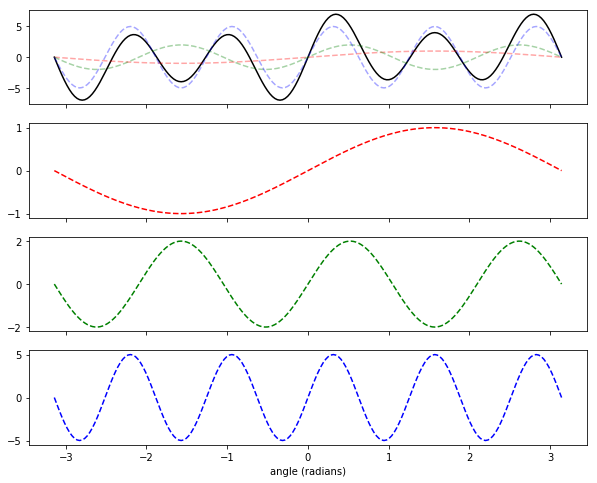

In [99]:
n = 201
t = np.linspace(-np.pi, np.pi, n)
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(10,8))
y1 = np.sin(x)
y2 = 2*np.sin(3*x)
y3 = 5*np.sin(5*x)
y = y1 + y2 + y3
ax1.plot(x, y, '-k')
ax1.plot(x, y1, '--r', x, y2, '--g', x, y3, '--b', alpha=0.35)
ax2.plot(x, y1, '--r')
ax3.plot(x, y2, '--g')
ax4.plot(x, y3, '--b')
plt.xlabel('angle (radians)')
plt.show()

Using numpy's `fft` module to take the Fourier transform, we get:

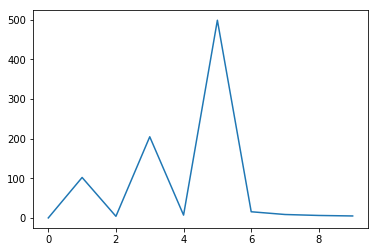

In [75]:
f = np.fft.fft(y)
freq = np.abs(f[0:10])
plt.plot(freq)
plt.show()

That looks about right. The Fourier transform recovered our original frequencies and amplitudes. But how does it do that?

Let's take a closer look at the formula:

$$ F(\omega) = \int^{\infty}_{-\infty}{e^{-i\omega t}f(t)dt}$$

By Euler's identity, we know that the exponential can be broken down into a real cosine part and an imaginary sine part: 

$$e^{-i\omega t} = \cos{\omega t} - i\sin{\omega t}$$

Let's relate that back to the $ e^{-i\omega t} $ term in the integral. With some algebra, we can re-arrange Euler's identity to get the following formulas:

$$ \cos{(\omega t)} = \frac{1}{2}e^{i{(\omega)}t} + \frac{1}{2}e^{i{(-\omega)}t}$$

$$ \sin{(\omega t)} = \frac{1}{2i} e^{i{(\omega)}t} - \frac{1}{2i}e^{i{(-\omega)}t}$$

**TODO FINISH SECTION**

## The Laplace transform as a generalized Fourier transform


The Laplace transform breaks a function down into sinusoids **and also exponentials**.

Further Reading:

- Brian Douglas video: https://www.youtube.com/watch?v=ZGPtPkTft8g
- http://dmorris.net/projects/tutorials/fourier_tutorial.pdf
- DSP Guide on The Laplace Transform: http://www.dspguide.com/CH32.PDF
- A filter primer: https://www.maximintegrated.com/en/app-notes/index.mvp/id/733